# Data Preparation 
* This notebook will analyze, transform, and prepare data for model training

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flight = pd.read_csv('../data/raw/Customer Flight Activity.csv')
loyalty = pd.read_csv('../data/raw/Customer Loyalty History.csv')

In [3]:
flight.info()

<class 'pandas.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


Based on **flight.info()**, we have no null values for this dataset.

In [4]:
loyalty.info()

<class 'pandas.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  str    
 2   Province            16737 non-null  str    
 3   City                16737 non-null  str    
 4   Postal Code         16737 non-null  str    
 5   Gender              16737 non-null  str    
 6   Education           16737 non-null  str    
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  str    
 9   Loyalty Card        16737 non-null  str    
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  str    
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: float64(4), 

Based on **loyalty.info()**, we have a lot of null values for salary, cancellation year, and cancellation month.

Customers have churned, but haven't cancelled their membership.

In [5]:
flight.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [6]:
loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


## Exploratory Data Analysis

In [7]:
print("\n--- Unique Values in Categorical Variables ---")
print(f"Gender: {loyalty['Gender'].nunique()}")
print(f"Education: {loyalty['Education'].nunique()}")
print(f"Marital Status: {loyalty['Marital Status'].nunique()}")
print(f"Loyalty Card: {loyalty['Loyalty Card'].nunique()}")
print(f"Enrollment Type: {loyalty['Enrollment Type'].nunique()}")
print(f"Loyalty Number: {loyalty['Loyalty Number'].nunique()} unique IDs")
print(f"Salaries: {loyalty['Salary'].nunique()} unique salary numbers")
print(f"Unique Countries: {loyalty['Country'].nunique()}")
print(f"Unique Provinces: {loyalty['Province'].nunique()}")
print(f"Unique Cities: {loyalty['City'].nunique()}")


--- Unique Values in Categorical Variables ---
Gender: 2
Education: 5
Marital Status: 3
Loyalty Card: 3
Enrollment Type: 2
Loyalty Number: 16737 unique IDs
Salaries: 5890 unique salary numbers
Unique Countries: 1
Unique Provinces: 11
Unique Cities: 29


* **Loyalty Numbers** Need to be removed  
* **Salaries** may give problems, depending on model
* There is a small number of unique **Cities**,
**Provinces**, and **Countries**

In [8]:
def print_value_percentages(df, column_name):
    """Print percentage distribution for a column in table format."""
    percentages = df[column_name].value_counts(normalize=True) * 100
    counts = df[column_name].value_counts()
    max_value_len = max(len(str(v)) for v in percentages.index)
    max_count_len = max(len(str(c)) for c in counts.values)

    print(f"\n{column_name}:")
    print("-----------------------------------")
    print(f"{'Value':<{max_value_len}} | {'Count':>{max_count_len}} | Percentage")
    print("-----------------------------------")

    for value in percentages.index:
        count = counts[value]
        pct = percentages[value]
        print(f"{value:<{max_value_len}} | {count:>{max_count_len}} | {pct:>6.2f}%")

    print("-----------------------------------")
print_value_percentages(loyalty, "Gender")
print_value_percentages(loyalty, "Education")
print_value_percentages(loyalty, "Marital Status")
print_value_percentages(loyalty, "Loyalty Card")
print_value_percentages(loyalty, "Enrollment Type")


Gender:
-----------------------------------
Value  | Count | Percentage
-----------------------------------
Female | 8410 |  50.25%
Male   | 8327 |  49.75%
-----------------------------------

Education:
-----------------------------------
Value                | Count | Percentage
-----------------------------------
Bachelor             | 10475 |  62.59%
College              |  4238 |  25.32%
High School or Below |   782 |   4.67%
Doctor               |   734 |   4.39%
Master               |   508 |   3.04%
-----------------------------------

Marital Status:
-----------------------------------
Value    | Count | Percentage
-----------------------------------
Married  | 9735 |  58.16%
Single   | 4484 |  26.79%
Divorced | 2518 |  15.04%
-----------------------------------

Loyalty Card:
-----------------------------------
Value  | Count | Percentage
-----------------------------------
Star   | 7637 |  45.63%
Nova   | 5671 |  33.88%
Aurora | 3429 |  20.49%
------------------------------

* Good distribution for **Gender**, **Marital Status**, and **Loyalty Card**
* **Education** can be problematic
* Enrollment type is too skewed

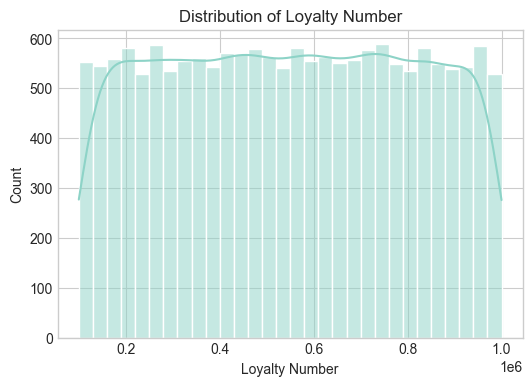

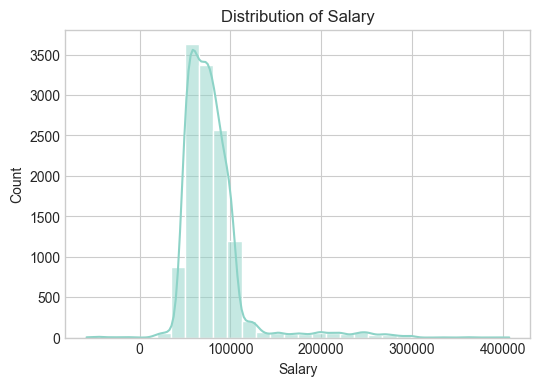

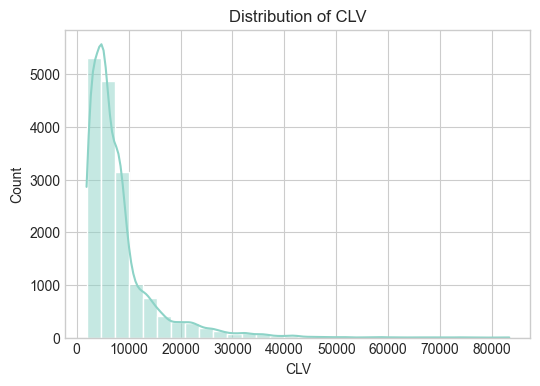

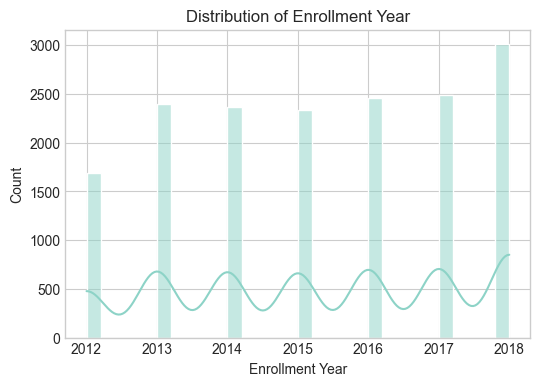

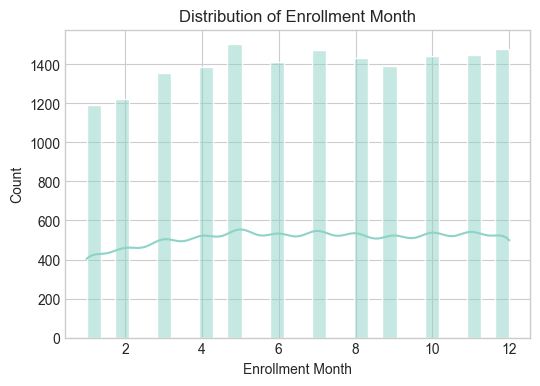

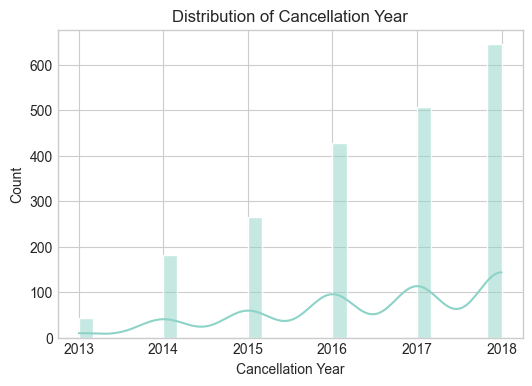

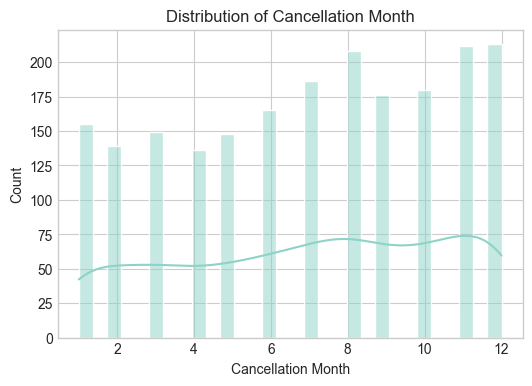

In [9]:
numeric_cols = loyalty.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(6,4))
    sns.histplot(loyalty[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

* We need to create a value that captures date of last activity for each user

In [10]:
flight['Has Activity'] = (
    (flight['Total Flights'] > 0) |
    (flight['Points Accumulated'] > 0) |
    (flight['Points Redeemed'] > 0)
)
active_flight = flight[flight['Has Activity']]
active_flight['Date'] = pd.to_datetime(active_flight[['Year', 'Month']].assign(Day=1))
most_recent = active_flight.loc[active_flight.groupby('Loyalty Number')['Date'].idxmax()]

customer_flight_summary = flight.groupby('Loyalty Number').agg({
    'Total Flights': 'sum',  # Total flights taken
    'Distance': 'sum',  # Total distance flown
    'Points Accumulated': 'sum',  # Total points accumulated
    'Points Redeemed': 'sum',  # Total points redeemed
    'Dollar Cost Points Redeemed': 'sum'  # Total dollar value redeemed
}).reset_index()

customer_flight_summary = customer_flight_summary.merge(
    most_recent[['Loyalty Number', 'Year', 'Month']],
    on='Loyalty Number',
    how='left')

customer_flight_summary=customer_flight_summary.rename(columns=
 {'Year': 'Most Recent Year', 'Month': 'Most Recent Month'})
print("\n--- Customer Flight Summary ---\n\n")
customer_flight_summary.head(10)


--- Customer Flight Summary ---




,Loyalty Number,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Most Recent Year,Most Recent Month
0,100018,46,81190,81190.0,1513,272,2018.0,12.0
1,100102,51,68918,68918.0,1195,215,2018.0,12.0
2,100140,47,72856,72856.0,593,107,2018.0,11.0
3,100214,22,38236,38236.0,861,155,2018.0,12.0
4,100272,37,54997,54997.0,1007,182,2018.0,11.0
5,100301,41,62849,62849.0,1381,249,2018.0,12.0
6,100364,33,45955,45955.0,559,101,2018.0,12.0
7,100380,33,55270,55270.0,1142,206,2018.0,12.0
8,100428,35,58281,58281.0,1658,298,2018.0,12.0
9,100504,19,27837,27837.0,0,0,2018.0,2.0


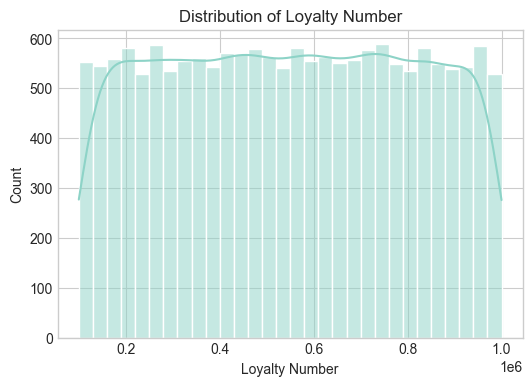

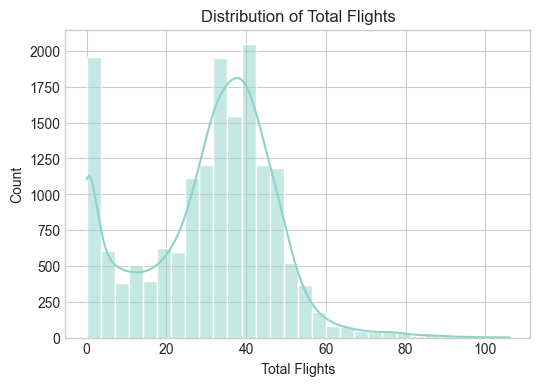

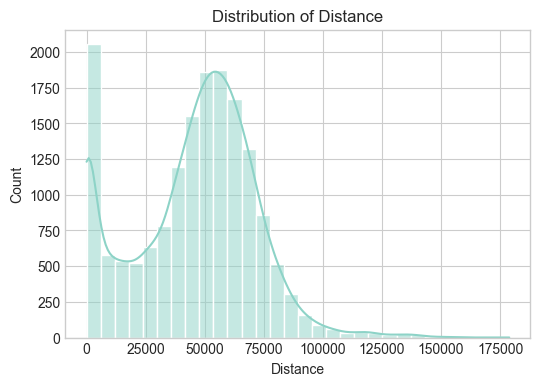

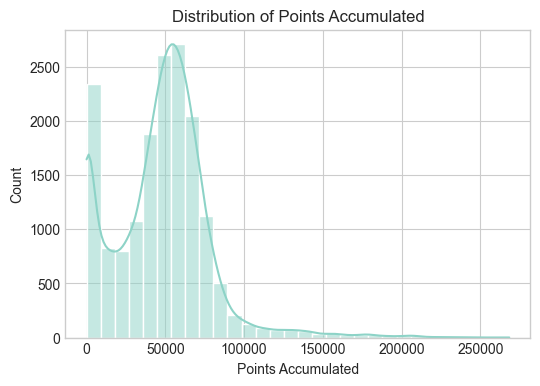

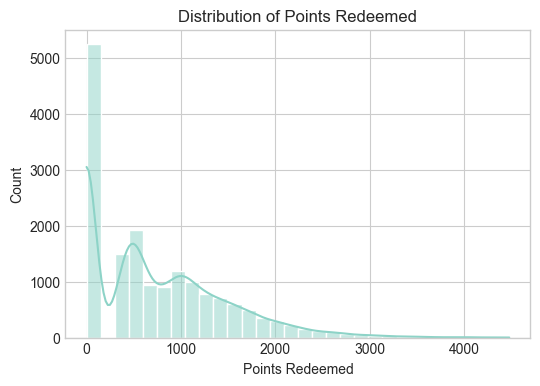

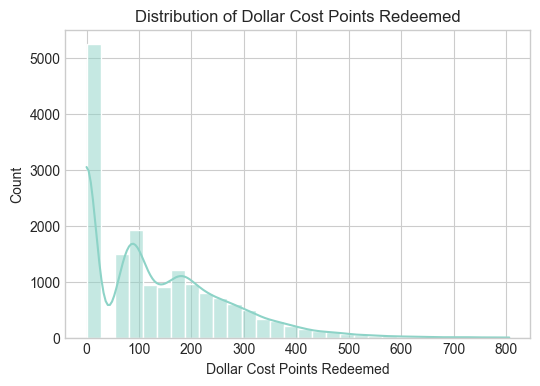

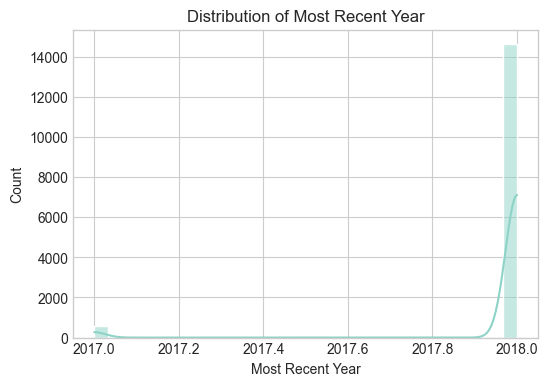

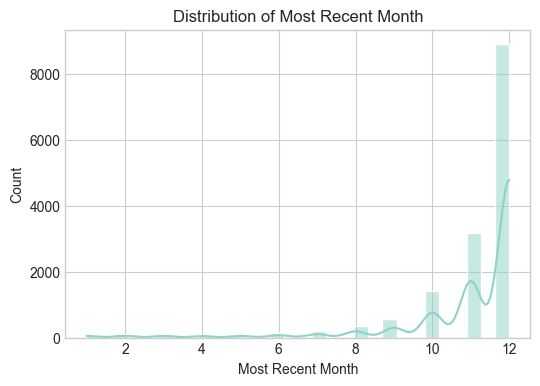

In [11]:
flight_numeric_cols = customer_flight_summary.select_dtypes(include=["int64", "float64"]).columns

for col in flight_numeric_cols:
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(6,4))
    sns.histplot(customer_flight_summary[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

With **Most Recent Date** values, we can calculate **Churn** based on time passed since last activity

*   If time >= 3 Months = Churned
*   If time < 3 Months = Active



In [12]:
# Create a datetime for December 2018
reference_date = pd.to_datetime('2018-12-01')

# Create a datetime column for most recent activity
customer_flight_summary['Most Recent Date'] = pd.to_datetime(
    customer_flight_summary.rename(columns={
        'Most Recent Year': 'year',
        'Most Recent Month': 'month'
    }).assign(day=1)[['year', 'month', 'day']]
)

# Calculate months difference
customer_flight_summary['Months Since Activity'] = (
    (reference_date.year - customer_flight_summary['Most Recent Date'].dt.year) * 12 +
    (reference_date.month - customer_flight_summary['Most Recent Date'].dt.month)
)

# Create churn column: 1 if >3 months, 0 if <=3 months
customer_flight_summary['Churn'] = (
    (customer_flight_summary['Months Since Activity'] >= 3) |
    (customer_flight_summary['Months Since Activity'].isna())).astype(int)

print("\n--- Churn Analysis ---")
print(f"\nChurn distribution:\n{customer_flight_summary['Churn'].value_counts()}")


--- Churn Analysis ---

Churn distribution:
Churn
0    13345
1     3392
Name: count, dtype: int64


* We have ***3392 churned customers***, but some never used the program at all
* We need to determine how many customers never used the program

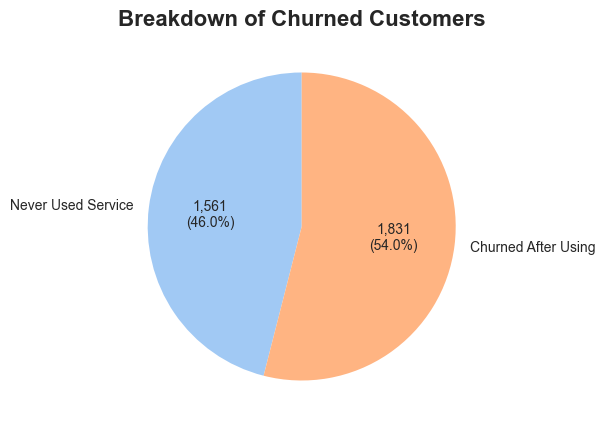

In [13]:
never_used = customer_flight_summary['Most Recent Date'].isna().sum()
total_churned = customer_flight_summary['Churn'].sum()
churned_after_using = total_churned - never_used
ratio = never_used / total_churned

categories = ['Never Used Service', 'Churned After Using']
counts = [never_used, churned_after_using]
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(7, 5))
plt.gca().set_facecolor('white')
colors = sns.color_palette('pastel')[0:2]

# Custom autopct function to show both count and percentage
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val:,}\n({pct:.1f}%)'
    return my_autopct
plt.pie(counts, labels=categories, autopct=make_autopct(counts), startangle=90, colors=colors)
plt.title('Breakdown of Churned Customers', fontsize=16, fontweight='bold')
plt.show()

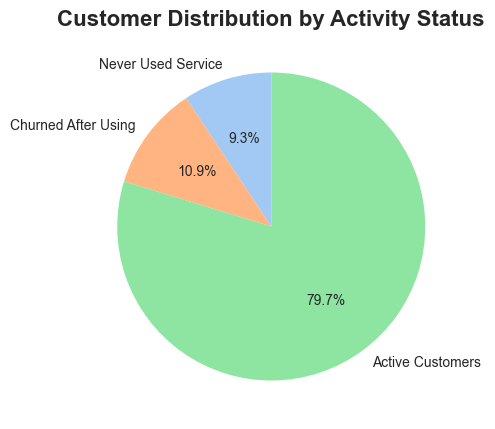

In [14]:
# Calculate counts
never_used = customer_flight_summary['Most Recent Date'].isna().sum()
churned_after_using = total_churned - never_used
active_customers = (customer_flight_summary['Churn'] == 0).sum()

# Create data for pie chart
categories = ['Never Used Service', 'Churned After Using', 'Active Customers']
counts = [never_used, churned_after_using, active_customers]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(7, 5))
colors = sns.color_palette('pastel')[0:3]
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Customer Distribution by Activity Status', fontsize=16, fontweight='bold')
plt.show()

#### Based on the business objective:
* Focus just on **Churn after using**
* Discard Customers who never used the program

## Feature Engineering

* We will add feature for change in activity for the last 3 months since last activity 
* We will aslso add aggregation features like **Overall Trend**, **Avg Points**, and **Trend**

In [15]:
# For customers with activity
customers_with_activity = customer_flight_summary[
    customer_flight_summary['Most Recent Date'].notna()
].copy()

# Initialize columnsobjective
customer_flight_summary['Points Most Recent'] = None
customer_flight_summary['Activity 1 Month Before'] = None
customer_flight_summary['Activity 2 Months Before'] = None
customer_flight_summary['Activity 3 Months Before'] = None
customer_flight_summary['Overall Trend'] = None
customer_flight_summary['Avg Monthly Points'] = None
customer_flight_summary['Activity Volatility'] = None


for idx, row in customers_with_activity.iterrows():
    loyalty_num = row['Loyalty Number']
    reference_date = row['Most Recent Date']

    # Get customer history
    customer_data = flight[flight['Loyalty Number'] == loyalty_num].copy()
    customer_data['Date'] = pd.to_datetime(customer_data[['Year', 'Month']].assign(Day=1))
    customer_data = customer_data.sort_values('Date')

    # Calculate dates
    date_1_month_before = reference_date - pd.DateOffset(months=1)
    date_2_months_before = reference_date - pd.DateOffset(months=2)
    date_3_months_before = reference_date - pd.DateOffset(months=3)

    # Get points for each period
    points_recent = customer_data[customer_data['Date'] == reference_date]['Points Accumulated'].sum()
    points_1_month = customer_data[customer_data['Date'] == date_1_month_before]['Points Accumulated'].sum()
    points_2_months = customer_data[customer_data['Date'] == date_2_months_before]['Points Accumulated'].sum()
    points_3_months = customer_data[customer_data['Date'] == date_3_months_before]['Points Accumulated'].sum()

    # Calculate absolute changes
    change_1_month = abs(points_recent - points_1_month)
    change_2_months = abs(points_1_month - points_2_months)
    change_3_months = abs(points_2_months - points_3_months)
    customer_flight_summary.loc[idx, 'Points Most Recent'] = points_recent
    customer_flight_summary.loc[idx, 'Activity 1 Month Before'] = change_1_month
    customer_flight_summary.loc[idx, 'Activity 2 Months Before'] = change_2_months
    customer_flight_summary.loc[idx, 'Activity 3 Months Before'] = change_3_months

    # Store actual point values
    customer_flight_summary.loc[idx, 'Points Most Recent'] = points_recent
    customer_flight_summary.loc[idx, 'Overall Trend'] = points_recent - points_3_months
    customer_flight_summary.loc[idx, 'Avg Monthly Points'] = (points_recent + points_1_month + points_2_months + points_3_months) / 4
    customer_flight_summary.loc[idx, 'Activity Volatility'] = (change_1_month + change_2_months + change_3_months) / 3


customer_flight_summary.head(10)

,Loyalty Number,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Most Recent Year,Most Recent Month,Most Recent Date,Months Since Activity,Churn,Points Most Recent,Activity 1 Month Before,Activity 2 Months Before,Activity 3 Months Before,Overall Trend,Avg Monthly Points,Activity Volatility
0,100018,46,81190,81190.0,1513,272,2018.0,12.0,2018-12-01,0.0,0,12060.0,5367.0,1973.0,4212.0,3128.0,8101.25,3850.666667
1,100102,51,68918,68918.0,1195,215,2018.0,12.0,2018-12-01,0.0,0,4636.0,2204.0,4003.0,4655.0,2856.0,3820.75,3620.666667
2,100140,47,72856,72856.0,593,107,2018.0,11.0,2018-11-01,1.0,0,4000.0,2728.0,5960.0,7232.0,4000.0,3126.0,5306.666667
3,100214,22,38236,38236.0,861,155,2018.0,12.0,2018-12-01,0.0,0,5289.0,5289.0,0.0,6032.0,-743.0,2830.25,3773.666667
4,100272,37,54997,54997.0,1007,182,2018.0,11.0,2018-11-01,1.0,0,1920.0,377.0,2297.0,12195.0,-10275.0,4103.0,4956.333333
5,100301,41,62849,62849.0,1381,249,2018.0,12.0,2018-12-01,0.0,0,2589.0,1164.0,1425.0,0.0,2589.0,1003.5,863.0
6,100364,33,45955,45955.0,559,101,2018.0,12.0,2018-12-01,0.0,0,2672.0,2672.0,4926.0,3393.0,1139.0,2282.75,3663.666667
7,100380,33,55270,55270.0,1142,206,2018.0,12.0,2018-12-01,0.0,0,9952.0,2024.0,7928.0,836.0,9116.0,4679.0,3596.0
8,100428,35,58281,58281.0,1658,298,2018.0,12.0,2018-12-01,0.0,0,4935.0,2136.0,2839.0,1253.0,1956.0,4804.25,2076.0
9,100504,19,27837,27837.0,0,0,2018.0,2.0,2018-02-01,10.0,1,3405.0,633.0,2820.0,1776.0,-3963.0,4784.25,1743.0


In [16]:
customer_flight_summary.columns

Index(['Loyalty Number', 'Total Flights', 'Distance', 'Points Accumulated',
       'Points Redeemed', 'Dollar Cost Points Redeemed', 'Most Recent Year',
       'Most Recent Month', 'Most Recent Date', 'Months Since Activity',
       'Churn', 'Points Most Recent', 'Activity 1 Month Before',
       'Activity 2 Months Before', 'Activity 3 Months Before', 'Overall Trend',
       'Avg Monthly Points', 'Activity Volatility'],
      dtype='str')

In [17]:
loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='str')

In [18]:
customer_complete = customer_flight_summary.merge(loyalty, on='Loyalty Number', how='left')
customer_complete.head()

,Loyalty Number,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Most Recent Year,Most Recent Month,Most Recent Date,Months Since Activity,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,46,81190,81190.0,1513,272,2018.0,12.0,2018-12-01,0.0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,51,68918,68918.0,1195,215,2018.0,12.0,2018-12-01,0.0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,47,72856,72856.0,593,107,2018.0,11.0,2018-11-01,1.0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,22,38236,38236.0,861,155,2018.0,12.0,2018-12-01,0.0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,37,54997,54997.0,1007,182,2018.0,11.0,2018-11-01,1.0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [19]:
master_data = customer_complete[customer_complete['Most Recent Date'].notna()].copy()

* We have removed the **1561** customers who never engaged with the program to begin with
* We will create a new column called **Customer Age** for better insight than **Enrollment Year**

In [20]:
master_data['Customer Age (Years)'] = 2018 - master_data['Enrollment Year']

In [21]:
master_data.columns

Index(['Loyalty Number', 'Total Flights', 'Distance', 'Points Accumulated',
       'Points Redeemed', 'Dollar Cost Points Redeemed', 'Most Recent Year',
       'Most Recent Month', 'Most Recent Date', 'Months Since Activity',
       'Churn', 'Points Most Recent', 'Activity 1 Month Before',
       'Activity 2 Months Before', 'Activity 3 Months Before', 'Overall Trend',
       'Avg Monthly Points', 'Activity Volatility', 'Country', 'Province',
       'City', 'Postal Code', 'Gender', 'Education', 'Salary',
       'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Customer Age (Years)'],
      dtype='str')

#### Columns to drop:
* Most Recent Year
* Most Recent Month
* Most Recent Date
* Months Since Activity
* Country
* Postal Code
* Enrollment Type
* Enrollment Month
* Enrollment Year (We have Customer Age)
* Cancellation Year
* Cancellation Month
#### Columns to consider:
* Province
* City
#### Columns to remove but track:
* Loyalty Number
* Churn



In [22]:
print("\nChurn by Province:")
print(master_data.groupby('Province')['Churn'].agg(['mean']).sort_values('mean', ascending=False))

print("\nChurn by City:")
print(master_data.groupby('City')['Churn'].agg(['mean']).sort_values('mean', ascending=False))



Churn by Province:
                          mean
Province                      
Prince Edward Island  0.142857
Manitoba              0.134583
Saskatchewan          0.129380
Quebec                0.127090
Ontario               0.122736
Newfoundland          0.121739
British Columbia      0.116384
Nova Scotia           0.112069
Alberta               0.108571
New Brunswick         0.106529
Yukon                 0.096154

Churn by City:
                    mean
City                    
Sudbury         0.175610
Tremblant       0.151934
Trenton         0.151724
Charlottetown   0.142857
Banff           0.139241
Winnipeg        0.134583
Regina          0.129380
Montreal        0.128946
Kelowna         0.123457
Quebec City     0.123288
Kingston        0.122905
St. John's      0.121739
Victoria        0.121469
Toronto         0.119491
West Vancouver  0.118243
Vancouver       0.116546
Thunder Bay     0.115880
Whistler        0.115530
Halifax         0.112069
Edmonton        0.110360
Fredericton

#### Based on Distribution of Churn
* Keep **Province**
* Drop **City**

In [23]:
columns_to_drop = [
    'Loyalty Number', 'Churn',
    'Most Recent Date', 'Most Recent Year', 'Most Recent Month',
    'Months Since Activity',
    'Country',
    'Postal Code',
    'City',
    'Cancellation Year', 'Cancellation Month',
    'Enrollment Month',
    'Enrollment Year',
]

loyalty_numbers = master_data['Loyalty Number'].copy()
y = master_data['Churn'].copy()

X_master = master_data.drop(columns=columns_to_drop, errors='ignore')

print("=== FINAL CLEAN DATASET ===")
print(f"Shape: {X_master.shape}")
print(f"Columns: {X_master.columns.tolist()}")
print(f"\nNull values:\n{X_master.isnull().sum()}")

=== FINAL CLEAN DATASET ===
Shape: (15176, 21)
Columns: ['Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed', 'Points Most Recent', 'Activity 1 Month Before', 'Activity 2 Months Before', 'Activity 3 Months Before', 'Overall Trend', 'Avg Monthly Points', 'Activity Volatility', 'Province', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Customer Age (Years)']

Null values:
Total Flights                     0
Distance                          0
Points Accumulated                0
Points Redeemed                   0
Dollar Cost Points Redeemed       0
Points Most Recent                0
Activity 1 Month Before           0
Activity 2 Months Before          0
Activity 3 Months Before          0
Overall Trend                     0
Avg Monthly Points                0
Activity Volatility               0
Province                          0
Gender                            0
Education                   

In [24]:
print("\nSalary statistics (non-null values):")
print(X_master['Salary'].describe())

skewness = X_master['Salary'].skew()
print(f"\nSkewness: {skewness:.2f}")
if abs(skewness) < 0.5:
    print("→ Distribution is fairly symmetric (use MEAN)")
elif abs(skewness) < 1:
    print("→ Distribution is moderately skewed (use MEDIAN)")
else:
    print("→ Distribution is highly skewed (use MEDIAN)")


Salary statistics (non-null values):
count     11302.000000
mean      79204.474606
std       34837.701633
min      -58486.000000
25%       59310.000000
50%       73522.000000
75%       88634.500000
max      407228.000000
Name: Salary, dtype: float64

Skewness: 3.21
→ Distribution is highly skewed (use MEDIAN)


* **Salary** has negative values and is highly skewed
* We need to replace negatives and fill nulls

In [25]:
print(f"\n Netative Values Count: {(X_master['Salary'] < 0).sum()}")
print(X_master[X_master['Salary'] < 0]['Salary'].head(20))


 Netative Values Count: 19
288     -10605.0
952     -58486.0
2094    -49001.0
2445    -46683.0
2570    -47310.0
4575    -39503.0
4888    -26322.0
4925     -9081.0
6120    -17534.0
6235    -46470.0
7277    -43234.0
7894    -45962.0
8227    -49830.0
9350    -19325.0
11737   -19332.0
11830   -46303.0
12893   -34079.0
15010   -57297.0
16007   -12497.0
Name: Salary, dtype: float64


* Negative **Salaries** have good values, just negative. We will convert them to positive
* Nulls will be converted to the median


In [26]:
X_master['Salary'] = X_master['Salary'].abs()
salary_median = X_master['Salary'].median()
X_master['Salary'] = X_master['Salary'].fillna(salary_median)
print("\n After cleaning:")
print(f"Negative salaries: {(X_master['Salary'] < 0).sum()}")
print(f"Null salaries: {X_master['Salary'].isnull().sum()}")


 After cleaning:
Negative salaries: 0
Null salaries: 0


* Data Transformation Completeted
* We now save **X_master**, **Loyalty Number**, and **Churn**

In [29]:
X_master.to_csv('../data/processed/master_features.csv', index=False)
tracking = pd.DataFrame({'Loyalty Number': loyalty_numbers, 'Churn': y})
tracking.to_csv('../data/processed/tracking_labels.csv', index=False)
print("===== Files Saved Succesfully =====")

===== Files Saved Succesfully =====
